## GOAL: Predict the 'total_cases' label for each (city, year, weekofyear) in the test set.

In [93]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

In [131]:
#From blog - https://www.drivendata.co/blog/dengue-benchmark/

def preprocess_data(data_path, labels_path=None):
    # load data and set index to city, year, weekofyear
    df = pd.read_csv(data_path, index_col=[0, 1, 2])
    
    # select features we want
    features = ['reanalysis_specific_humidity_g_per_kg', 
                 'reanalysis_dew_point_temp_k', 
                 'station_avg_temp_c', 
                 'station_min_temp_c', 
#                 'total_cases_1WLag',
#                 'total_cases_2WLag',
#                 'Average_3WLag_Cases',
#                 'expected_avg3wlagcasesbyweek',
                 'ndvi_se',
                 'reanalysis_tdtr_k'
                  ]
    df = df[features]
    
    # fill missing values = impute
    
    #forward fill
    #df.fillna(method='ffill', inplace=True)

    #simple impute with median
    #missing_values should be set to np.nan, since pd.NA will be converted to np.nan
    #simple_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    #data_with_imputed_values = simple_imputer.fit_transform(df)
    
    #KNN imputer = K-nearest neighbor
    #Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set.
    #knn_imputer = KNNImputer(n_neighbors=2)
    #data_with_imputed_values = knn_imputer.fit_transform(df)
        
    #A more sophisticated approach is to use the IterativeImputer class, 
    #which models each feature with missing values as a function of other features, 
    #and uses that estimate for imputation. 
    #It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y 
    #and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. 
    #Then, the regressor is used to predict the missing values of y. 
    #This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. 
    #The results of the final imputation round are returned.
    
    #Note This estimator is still experimental for now: 
    #default parameters or details of behaviour might change without any deprecation cycle
    imp_imputer = IterativeImputer(max_iter=10, random_state=0)  
    imp_imputer.fit(df)
    IterativeImputer(random_state=0)
    data_with_imputed_values = imp_imputer.transform(df)
    
    #Output of sklearn imputers in a numpy array. Convert it to pandas dataframe
    idf = pd.DataFrame(data_with_imputed_values)
    idf.columns=df.columns
    idf.index=df.index
    
    # add labels to dataframe
    if labels_path:
        labels = pd.read_csv(labels_path, index_col=[0, 1, 2])
        #df = df.join(labels)
        idf = idf.join(labels)
    
    # separate san juan and iquitos
    #sj = df.loc['sj']
    #iq = df.loc['iq']
    sj = idf.loc['sj']
    iq = idf.loc['iq']    
    
    return sj, iq

## NOTE: Various imputation methods have no impact on RMSE score for this data. No need to spend more time exploring imputation techniques for now.

In [132]:
sj_train, iq_train = preprocess_data(r"C:\Users\FunTime\Desktop\DengAI_Competetion\From_Rupa\dengue_features_train_mod_4.csv",
                                    labels_path="C:\\Users\\FunTime\\Desktop\\DengAI_Competetion\dengue_labels_train.csv")

In [133]:
sj_train.describe()

,reanalysis_specific_humidity_g_per_kg,reanalysis_dew_point_temp_k,station_avg_temp_c,station_min_temp_c,ndvi_se,reanalysis_tdtr_k,total_cases
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,16.553614,295.110396,27.007603,22.597868,0.177707,2.529877,34.180556
std,1.555980,1.564936,1.410991,1.501888,0.056604,0.527946,51.381372
min,11.715714,289.642857,22.842857,17.800000,-0.015533,1.357143,0.000000
25%,15.248214,293.853214,25.842857,21.700000,0.140121,2.157143,9.000000
50%,16.832143,295.447143,27.214286,22.800000,0.177264,2.457143,19.000000
75%,17.854286,296.415714,28.175000,23.900000,0.211596,2.800000,37.000000
max,19.440000,297.795714,30.071429,25.600000,0.393129,5.314705,461.000000


In [134]:
iq_train.describe()

,reanalysis_specific_humidity_g_per_kg,reanalysis_dew_point_temp_k,station_avg_temp_c,station_min_temp_c,ndvi_se,reanalysis_tdtr_k,total_cases
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,17.093412,295.491084,27.516117,21.212693,0.249883,9.173313,7.565385
std,1.440514,1.411922,0.931188,1.258203,0.077198,2.469252,10.765478
min,12.111429,290.088571,21.400000,14.700000,0.029880,3.714286,0.000000
25%,16.121429,294.596429,27.000000,20.600000,0.194748,7.353571,1.000000
50%,17.420714,295.831429,27.600000,21.400000,0.249593,8.942857,5.000000
75%,18.176786,296.544643,28.100000,22.000000,0.302129,11.003571,9.000000
max,20.461429,298.450000,30.800000,24.200000,0.538314,16.028571,116.000000


## KNN Regressor
#### Step 0  - Split the dataset into training and test datasets. 
#### Step 1 - Scale the dataset using minmaxscaler. 
#### Step 2 - Use KNeighborsClassifier classifier and report the score on the test dataset.

## 
## Step 0 - Split data into train & test

In [327]:
from sklearn.model_selection import train_test_split

labels = pd.read_csv(r"C:\\Users\\FunTime\\Desktop\\DengAI_Competetion\dengue_labels_train.csv", index_col=[0, 1, 2])
sj_labels = labels.loc['sj']
iq_labels = labels.loc['iq'] 
    
# Split the dataset in 80% (train), 20% (test) ratio
sj_train_subtrain_X, sj_train_subtest_x, sj_target_subtrain_Y, sj_target_subtest_y = train_test_split(sj_train, sj_train.total_cases, test_size=0.2, random_state=0)
iq_train_subtrain_X, iq_train_subtest_x, iq_target_subtrain_Y, iq_target_subtest_y = train_test_split(iq_train, iq_train.total_cases, test_size=0.2, random_state=0)

#sj_train_subtrain_X, sj_train_subtest_x, sj_target_subtrain_Y, sj_target_subtest_y = train_test_split(sj_train, sj_labels, test_size=0.2, random_state=0)
#iq_train_subtrain_X, iq_train_subtest_x, iq_target_subtrain_Y, iq_target_subtest_y = train_test_split(iq_train, iq_labels, test_size=0.2, random_state=0)

#print(type(sj_train_subtrain_X))
print(sj_train_subtrain_X.shape)
print(sj_train_subtrain_X.columns)
#print(sj_train_subtrain_X.index)
sj_train_subtrain_X.drop(columns=['fitted', 'total_cases'], inplace=True)
print(sj_train_subtrain_X.columns)

#print(type(sj_train_subtest_x))
print(sj_train_subtest_x.shape)
print(sj_train_subtest_x.columns)
#print(sj_train_subtest_x.index)
sj_train_subtest_x.drop(columns=['fitted', 'total_cases'], inplace=True)
print(sj_train_subtest_x.columns)

print(type(sj_target_subtrain_Y))
print(sj_target_subtrain_Y.shape)
#print(sj_target_subtrain_Y.columns)

print(type(sj_target_subtest_y))
print(sj_target_subtest_y.shape)
#print(sj_target_subtest_y.columns)

#print(type(iq_train_subtrain_X))
print(iq_train_subtrain_X.shape)
print(iq_train_subtrain_X.columns)
#print(iq_train_subtrain_X.index)
iq_train_subtrain_X.drop(columns=['fitted', 'total_cases'], inplace=True)
print(iq_train_subtrain_X.columns)

#print(type(iq_train_subtest_x))
print(iq_train_subtest_x.shape)
print(iq_train_subtest_x.columns)
#print(iq_train_subtest_x.index)
iq_train_subtest_x.drop(columns=['fitted', 'total_cases'], inplace=True)
print(iq_train_subtest_x.columns)

print(type(iq_target_subtrain_Y))
print(iq_target_subtrain_Y.shape)
#print(iq_target_subtrain_Y.columns)

print(type(iq_target_subtest_y))
print(iq_target_subtest_y.shape)
#print(iq_target_subtest_y.columns)

print("SJ Train shape, SJ Test shape", sj_train_subtrain_X.shape, sj_train_subtest_x.shape)
print("IQ Train shape, IQ Test shape", iq_train_subtrain_X.shape, iq_train_subtest_x.shape)

print("SJ Target shape, SJ Test shape", sj_target_subtrain_Y.shape, sj_target_subtest_y.shape)
print("IQ Target shape, IQ Test shape", iq_target_subtrain_Y.shape, iq_target_subtest_y.shape)

(748, 8)
Index(['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k',
       'station_avg_temp_c', 'station_min_temp_c', 'ndvi_se',
       'reanalysis_tdtr_k', 'total_cases', 'fitted'],
      dtype='object')
Index(['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k',
       'station_avg_temp_c', 'station_min_temp_c', 'ndvi_se',
       'reanalysis_tdtr_k'],
      dtype='object')
(188, 8)
Index(['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k',
       'station_avg_temp_c', 'station_min_temp_c', 'ndvi_se',
       'reanalysis_tdtr_k', 'total_cases', 'fitted'],
      dtype='object')
Index(['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k',
       'station_avg_temp_c', 'station_min_temp_c', 'ndvi_se',
       'reanalysis_tdtr_k'],
      dtype='object')
<class 'pandas.core.series.Series'>
(748,)
<class 'pandas.core.series.Series'>
(188,)
(416, 8)
Index(['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point

C:\Users\FunTime\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [328]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

## Step 1 - Scale Features

In [329]:
# Scaling of features
#sj_train_subtrain_X, sj_train_subtest_x, sj_target_subtrain_Y, sj_target_subtest_y 
scaler = MinMaxScaler()
scaler.fit(sj_train_subtrain_X)
sj_train_subtrain_X_scaled = scaler.transform(sj_train_subtrain_X)
clf =  KNeighborsClassifier(n_neighbors=3).fit(sj_train_subtrain_X_scaled, sj_target_subtrain_Y) 

sj_train_subtest_x_scaled = scaler.transform(sj_train_subtest_x)
print("MinMaxScaled Test score: {:.4f}".format(clf.score(sj_train_subtest_x_scaled, sj_target_subtest_y)))

#iq_train_subtrain_X, iq_train_subtest_x, iq_target_subtrain_Y, iq_target_subtest_y 
scaler = MinMaxScaler()
scaler.fit(iq_train_subtrain_X)
iq_train_subtrain_X_scaled = scaler.transform(iq_train_subtrain_X)
clf =  KNeighborsClassifier(n_neighbors=3).fit(iq_train_subtrain_X_scaled, iq_target_subtrain_Y) 

iq_train_subtest_x_scaled = scaler.transform(iq_train_subtest_x)
print("MinMaxScaled Test score: {:.4f}".format(clf.score(iq_train_subtest_x_scaled, iq_target_subtest_y)))

MinMaxScaled Test score: 0.0213
MinMaxScaled Test score: 0.1154


## Step 2 - Repeat Step 1 using pipelines and report the score

In [330]:
# Use pipeline
from sklearn.pipeline import make_pipeline

#sj_train_subtrain_X, sj_train_subtest_x, sj_target_subtrain_Y, sj_target_subtest_y 
pipe = make_pipeline(MinMaxScaler(), KNeighborsClassifier(n_neighbors=3))
pipe.fit(sj_train_subtrain_X, sj_target_subtrain_Y)
print("Train score: {:.4f}".format(pipe.score(sj_train_subtrain_X, sj_target_subtrain_Y)))
print("Test score: {:.4f}".format(pipe.score(sj_train_subtest_x, sj_target_subtest_y)))

#iq_train_subtrain_X, iq_train_subtest_x, iq_target_subtrain_Y, iq_target_subtest_y 
pipe = make_pipeline(MinMaxScaler(), KNeighborsClassifier(n_neighbors=3))
pipe.fit(iq_train_subtrain_X, iq_target_subtrain_Y)
print("Train score: {:.4f}".format(pipe.score(iq_train_subtrain_X, iq_target_subtrain_Y)))
print("Test score: {:.4f}".format(pipe.score(iq_train_subtest_x, iq_target_subtest_y)))

Train score: 0.3249
Test score: 0.0213
Train score: 0.4303
Test score: 0.1154


## Step 3 - Use the pipeline object from Step 2 and make a grid search on parameter of number of neighbor

In [331]:
from sklearn.model_selection import GridSearchCV

knn_pipe = make_pipeline(MinMaxScaler(), KNeighborsClassifier())
from sklearn.model_selection import GridSearchCV
import numpy as np

#sj_train_subtrain_X, sj_train_subtest_x, sj_target_subtrain_Y, sj_target_subtest_y 
param_grid = {'kneighborsclassifier__n_neighbors':  np.arange(1, 30, 2)}
grid = GridSearchCV(knn_pipe, param_grid=param_grid, cv=10,return_train_score=True)
grid.fit(sj_train_subtrain_X, sj_target_subtrain_Y)
print("Best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: {}".format(grid.best_params_))

print("Test-set score: {:.3f}".format(grid.score(sj_train_subtest_x, sj_target_subtest_y)))

#iq_train_subtrain_X, iq_train_subtest_x, iq_target_subtrain_Y, iq_target_subtest_y 
param_grid = {'kneighborsclassifier__n_neighbors':  np.arange(1, 30, 2)}
grid = GridSearchCV(knn_pipe, param_grid=param_grid, cv=10,return_train_score=True)
grid.fit(iq_train_subtrain_X, iq_target_subtrain_Y)
print("Best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: {}".format(grid.best_params_))

print("Test-set score: {:.3f}".format(grid.score(iq_train_subtest_x, iq_target_subtest_y)))

C:\Users\FunTime\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Best mean cross-validation score: 0.031
Best parameters: {'kneighborsclassifier__n_neighbors': 19}
Test-set score: 0.053


C:\Users\FunTime\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Best mean cross-validation score: 0.214
Best parameters: {'kneighborsclassifier__n_neighbors': 29}
Test-set score: 0.135


In [332]:
from sklearn.neighbors import KNeighborsRegressor

In [333]:
sj_knn_reg = KNeighborsRegressor(n_neighbors=19)
print(sj_train_subtrain_X.shape, sj_train_subtest_x.shape, sj_target_subtrain_Y.shape, sj_target_subtest_y.shape)
sj_reg = sj_knn_reg.fit(sj_train_subtrain_X, sj_target_subtrain_Y)
#sj_reg = sj_knn_reg.fit(sj_train_subtrain_X, sj_target_subtest_y)
#sj_reg = sj_knn_reg.fit(sj_train_subtrain_X, sj_train_subtest_x)
                        
#sj_reg_score = sj_reg.score(sj_train_subtrain_X, sj_target_subtrain_Y) 
#print(sj_reg_score)
#print(type(sj_train_subtest_x))
#print(sj_train_subtest_x.columns)
sj_target_predict = sj_reg.predict(sj_train_subtest_x)
print(sj_target_predict)
print(sj_target_predict.shape)
#print(sj_target_predict.columns)

iq_knn_reg = KNeighborsRegressor(n_neighbors=29)
print(iq_train_subtrain_X.shape, iq_train_subtest_x.shape, iq_target_subtrain_Y.shape, iq_target_subtest_y.shape)
iq_reg = iq_knn_reg.fit(iq_train_subtrain_X, iq_target_subtrain_Y)
#iq_reg = iq_knn_reg.fit(iq_train_subtrain_X, iq_target_subtest_y)
#iq_reg = iq_knn_reg.fit(iq_train_subtrain_X, iq_train_subtest_x)

#iq_reg_score = iq_reg.score(iq_train_subtrain_X, iq_target_subtrain_Y) 
#print(iq_reg_score)
iq_target_predict = iq_reg.predict(iq_train_subtest_x)
print(iq_target_predict)
print(iq_target_predict.shape)
#print(iq_target_predict.columns)


(748, 6) (188, 6) (748,) (188,)
[14.36842105 40.15789474 35.05263158 25.         65.68421053 49.15789474
 27.21052632 37.05263158 21.52631579 19.42105263 42.47368421 27.
 38.63157895 39.15789474 13.10526316 33.63157895 34.57894737 17.21052632
 19.26315789 59.26315789 28.42105263 27.         28.31578947 52.68421053
 29.21052632 19.         28.36842105 54.26315789 46.89473684 38.63157895
 18.84210526 26.42105263 57.94736842 70.21052632 21.89473684 52.84210526
 11.05263158 16.73684211 56.47368421 28.31578947 39.15789474 18.42105263
 27.94736842 26.63157895 22.78947368 25.15789474 53.         41.15789474
 21.26315789 34.42105263 15.47368421 33.31578947 38.68421053 27.10526316
 43.         21.36842105 34.89473684 18.21052632 37.31578947 15.47368421
 15.21052632 30.89473684 23.36842105 39.10526316 35.63157895 24.78947368
 20.21052632 31.15789474 52.42105263 18.10526316 43.94736842 38.94736842
 37.21052632 47.47368421 12.63157895 50.89473684 18.10526316 26.73684211
 20.15789474 26.47368421 39

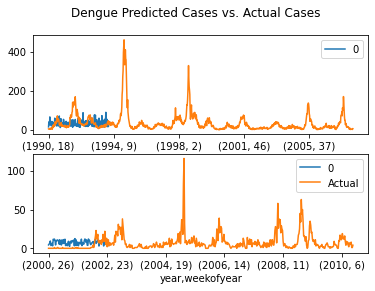

In [334]:
%matplotlib inline
from matplotlib import pyplot as plt

figs, axes = plt.subplots(nrows=2, ncols=1)

# plot sj
sj_predict_srs = pd.DataFrame(sj_target_predict)
sj_predict_srs.plot(ax=axes[0], label="Predictions")
sj_train.total_cases.plot(ax=axes[0], label="Actual")

# plot iq
iq_predict_srs = pd.DataFrame(iq_target_predict)
iq_predict_srs.plot(ax=axes[1], label="Predictions")
iq_train.total_cases.plot(ax=axes[1], label="Actual")

plt.suptitle("Dengue Predicted Cases vs. Actual Cases")
plt.legend()


In [335]:
from sklearn.metrics import mean_squared_error
from math import sqrt

sj_mse = mean_squared_error(sj_target_subtest_y, sj_target_predict)
sj_rmse = sqrt(sj_mse)
print(sj_rmse)

iq_mse = mean_squared_error(iq_target_subtest_y, iq_target_predict)
iq_rmse = sqrt(iq_mse)
print(iq_rmse)

54.34061436260287
14.738024111322936


In [336]:
from sklearn.metrics import mean_absolute_error
#print("Mean Absolute Error:")
print(mean_absolute_error(sj_target_subtest_y, sj_target_predict))
print(mean_absolute_error(iq_target_subtest_y, iq_target_predict))

27.09182530795072
7.024867374005306


In [339]:
sj_test, iq_test = preprocess_data(r"C:\Users\FunTime\Desktop\DengAI_Competetion\dengue_features_test.csv")

print(sj_test.shape)
print(sj_test.columns)
sj_predictions = sj_reg.predict(sj_test).astype(int)

print(iq_test.shape)
print(iq_test.columns)
iq_predictions = iq_reg.predict(iq_test).astype(int)

submission = pd.read_csv(r"C:\Users\FunTime\Desktop\DengAI_Competetion\submission_format.csv",
                         index_col=[0, 1, 2])

submission.total_cases = np.concatenate([sj_predictions, iq_predictions])
submission.to_csv(r"C:\Users\FunTime\Desktop\DengAI_Competetion\benchmark4.csv")

(260, 6)
Index(['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k',
       'station_avg_temp_c', 'station_min_temp_c', 'ndvi_se',
       'reanalysis_tdtr_k'],
      dtype='object')
(156, 6)
Index(['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k',
       'station_avg_temp_c', 'station_min_temp_c', 'ndvi_se',
       'reanalysis_tdtr_k'],
      dtype='object')
